# VINCULACION DE BASE FINAL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns

In [2]:
#Para cuando se ejecuta desde google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Para cuando se carga desde el usuario de Cristian Borrero
df= pd.read_excel("drive/My Drive/Base_bruta_v7.xlsx")

In [ ]:
# Para cuando se carga desde el usuario de Angie Vela
##df= pd.read_excel("drive/My Drive/Proyecto de Profundización II/Base_bruta_v7.xlsx")

# Transformación variables categoricas

In [4]:
# prompt: eliminar la columna LLAVE_SUJETO del df
df = df.drop('LLAVE_SUJETO', axis=1)

In [5]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Asegúrate de que la columna 'Pago_Digital' esté correctamente convertida a numérica
df['Pago_Digital'] = df['Pago_Digital'].replace({'NO': 0, 'SÍ': 1})

# Crear una copia del DataFrame para trabajar
df_encoded = df.copy()

# Verificar que 'Pago_Digital' sea numérica
print("Tipo de dato de 'Pago_Digital':", df_encoded['Pago_Digital'].dtype)

# Identificar variables ordinales
ordinal_cols = {
    'Nivel_educativo': ['Ninguno', 'Primaria', 'Secundaria', 'Técnico', 'Tecnólogos', 'Universitarios', 'Posgrado'],
    'Rango_ingresos': ['< 250.000', '> 250.001 < 500.000', '> 500.001 < 750.000', '> 750.001 < 1.000.000',
                       '> 1.000.001 < 1.500.000', '> 1.500.001 < 2.000.000', '> 2.000.001 < 3.000.000',
                       '> 3.000.001 < 4.000.000', '> 4.000.001 < 5.000.000', '> de 5.000.000'],
    'Rango_gastos': ['< 250.000', '> 250.001 < 500.000', '> 500.001 < 750.000', '> 750.001 < 1.000.000',
                     '>1.000.001 < 1.500.000', '> 1.500.001 < 2.000.000', '> 2.000.001 < 3.000.000',
                     '> 3.000.001 < 4.000.000', '> 4.000.001 < 5.000.000', '> 5.000.000'],
    'Frecuencia_Ingresos': ['No percibe', 'Diario', 'Semanal', 'Quincenal', 'Mensual', 'Irregulares'],
    'Rango_edad': ['18-25', '26-35', '36-45', '46-55', '> 56'],
    'EstratoIMP': [1, 2, 3, 4, 5, 6]
}

# 1. Aplicar Codificación Ordinal a las variables ordinales
ordinal_columns = [col for col in ordinal_cols.keys() if col in df_encoded.columns]
if ordinal_columns:
    ordinal_enc = OrdinalEncoder(categories=[ordinal_cols[col] for col in ordinal_columns])
    df_encoded[ordinal_columns] = ordinal_enc.fit_transform(df_encoded[ordinal_columns])

# Identificar variables categóricas después de la codificación ordinal
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

# Identificar columnas de tipo object
object_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

# Aplicar One-Hot Encoding a todas las columnas de tipo object
df_encoded = pd.get_dummies(df_encoded, columns=object_cols, drop_first=True)



Tipo de dato de 'Pago_Digital': int64


<ipython-input-5-a377457af552>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Pago_Digital'] = df['Pago_Digital'].replace({'NO': 0, 'SÍ': 1})


# Generación de base de entrenamiento y testeo

In [6]:
# Definir la variable dependiente (target) y las variables independientes (features)
X = df_encoded.drop(columns=['Pago_Digital'])
y = df_encoded['Pago_Digital']

In [7]:
# Convertir columnas booleanas a enteros (0 y 1)
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Asegurarse de que todas las variables sean numéricas
X = X.apply(pd.to_numeric, errors='coerce')

# Reemplazar cualquier NaN restante por 0 o cualquier otra estrategia de imputación que prefieras
X = X.fillna(0)

<ipython-input-7-65b7ad1ee5d9>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [8]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% de los datos se utilizarán para prueba
    random_state=42  # Semilla para reproducibilidad
)

print(f'Dimensión del conjunto de entrenamiento: {X_train.shape}')
print(f'Dimensión del conjunto de prueba: {X_test.shape}')

Dimensión del conjunto de entrenamiento: (3927, 162)
Dimensión del conjunto de prueba: (1683, 162)


# MODELOS CLASIFICACIÓN

## SELECCION DE MEJOR MODELO

In [ ]:
pip install --upgrade pycaret

In [ ]:
from pycaret.classification import setup, compare_models, tune_model, plot_model,evaluate_model,\
  save_model, load_model

In [ ]:
datasetup = setup(data = df_encoded, target = 'Monedero_Digital', session_id=12)

,Description,Value
0,Session id,12
1,Target,Monedero_Digital
2,Target type,Binary
3,Original data shape,"(5610, 163)"
4,Transformed data shape,"(5610, 163)"
5,Transformed train set shape,"(3926, 163)"
6,Transformed test set shape,"(1684, 163)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [ ]:
Best_models= compare_models( )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7759,0.8596,0.7858,0.7916,0.7882,0.5502,0.5510,1.4720
rf,Random Forest Classifier,0.7702,0.8505,0.7873,0.7821,0.7843,0.5385,0.5391,1.1950
lightgbm,Light Gradient Boosting Machine,0.7697,0.8495,0.7724,0.7900,0.7808,0.5384,0.5390,1.0920
et,Extra Trees Classifier,0.7680,0.8477,0.7930,0.7757,0.7839,0.5334,0.5341,1.0600
ridge,Ridge Classifier,0.7677,0.8528,0.7753,0.7850,0.7797,0.5340,0.5347,0.1630
lda,Linear Discriminant Analysis,0.7669,0.8522,0.7743,0.7845,0.7790,0.5325,0.5332,0.1610
xgboost,Extreme Gradient Boosting,0.7669,0.8437,0.7772,0.7833,0.7799,0.5322,0.5328,0.5160
lr,Logistic Regression,0.7662,0.8538,0.7772,0.7822,0.7792,0.5307,0.5314,2.0930
ada,Ada Boost Classifier,0.7657,0.8513,0.7892,0.7746,0.7815,0.5289,0.5295,0.4300
svm,SVM - Linear Kernel,0.7259,0.8384,0.7023,0.7972,0.7077,0.4539,0.4796,0.2550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# ENTRENAMIENTO XGBOOST

In [ ]:
pip install xgboost

In [ ]:
# Librerias
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## GRILLA DE HIPERPARAMETROS




In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Definir el espacio de búsqueda para los hiperparámetros
param_dist = {
    'n_estimators': np.arange(50, 400, 50),       # Número de árboles en el bosque
    'learning_rate': np.linspace(0.01, 0.3, 10),  # Tasa de aprendizaje
    'max_depth': np.arange(3, 10),                # Profundidad máxima del árbol
    'min_child_weight': np.arange(1, 10),         # Peso mínimo de las hojas
    'subsample': np.linspace(0.5, 1.0, 5),        # Submuestreo de filas
    'colsample_bytree': np.linspace(0.5, 1.0, 5), # Submuestreo de columnas
    'gamma': np.linspace(0, 0.5, 5),              # Regularización
    'scale_pos_weight': [1, 1.53]                 # Ajuste por desbalance de clases
}

# Crear el clasificador XGBoost
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Configurar RandomizedSearchCV para buscar los mejores hiperparámetros
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=1000,  # Número de combinaciones aleatorias que probar
    scoring='f1',  # Usar F1-Score para optimizar
    n_jobs=-1,  # Usar todos los núcleos disponibles
    cv=5,  # Validación cruzada de 5 pliegues
    verbose=3,  # Mostrar el proceso de búsqueda
    random_state=42
)

# Ajustar el modelo con los mejores hiperparámetros
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:00:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 0.625, 'scale_pos_weight': 1.53, 'n_estimators': 350, 'min_child_weight': 6, 'max_depth': 3, 'learning_rate': 0.042222222222222223, 'gamma': 0.0, 'colsample_bytree': 0.875}
Confusion Matrix:
[[558 249]
 [149 727]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       807
           1       0.74      0.83      0.79       876

    accuracy                           0.76      1683
   macro avg       0.77      0.76      0.76      1683
weighted avg       0.77      0.76      0.76      1683



Grilla de busqueda con GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Definir la grilla de búsqueda con exactamente cuatro valores por hiperparámetro
param_grid = {
    'n_estimators': [100, 150, 200, 250],  # Número de árboles
    'learning_rate': [0.05, 0.1, 0.2, 0.3],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7, 9],  # Profundidad máxima del árbol
    'min_child_weight': [1, 2, 4, 6],  # Peso mínimo de las hojas
    'subsample': [0.6, 0.7, 0.8, 1.0],  # Submuestreo de filas
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],  # Submuestreo de columnas
    'gamma': [0, 0.1, 0.2, 0.3],  # Regularización
    'scale_pos_weight': [1, 1.53]  # Ajuste por desbalance de clases
}

# Crear el clasificador XGBoost
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Configurar GridSearchCV con la nueva grilla
grid_search = GridSearchCV(
    model, param_grid=param_grid,
    scoring='accuracy',  # Usar Accuracy para optimizar
    n_jobs=-1,  # Usar todos los núcleos disponibles
    cv=3,  # Validación cruzada de 5 pliegues
    verbose=3  # Mostrar el proceso de búsqueda
)

# Ajustar el modelo con los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar el reporte de clasificación y la matriz de confusión
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Definir el espacio de búsqueda para los hiperparámetros
param_dist = {
    'n_estimators': np.arange(50, 400, 50),       # Número de árboles en el bosque
    'learning_rate': np.linspace(0.01, 0.3, 10),  # Tasa de aprendizaje
    'max_depth': np.arange(3, 10),                # Profundidad máxima del árbol
    'min_child_weight': np.arange(1, 10),         # Peso mínimo de las hojas
    'subsample': np.linspace(0.5, 1.0, 5),        # Submuestreo de filas
    'colsample_bytree': np.linspace(0.5, 1.0, 5), # Submuestreo de columnas
    'gamma': np.linspace(0, 0.5, 5),              # Regularización
    'scale_pos_weight': [1, 1.53]                 # Ajuste por desbalance de clases
}

# Crear el clasificador XGBoost
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Configurar RandomizedSearchCV para buscar los mejores hiperparámetros
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones aleatorias que probar
    scoring='f1',  # Usar F1-Score para optimizar
    n_jobs=-1,  # Usar todos los núcleos disponibles
    cv=5,  # Validación cruzada de 5 pliegues
    verbose=3,  # Mostrar el proceso de búsqueda
    random_state=42
)

# Ajustar el modelo con los mejores hiperparámetros
random_search.fit(X_train_significant , y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Best Hyperparameters:", random_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_significant)

# Mostrar el reporte de clasificación y la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:40:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 0.75, 'scale_pos_weight': 1.53, 'n_estimators': 350, 'min_child_weight': 9, 'max_depth': 3, 'learning_rate': 0.042222222222222223, 'gamma': 0.375, 'colsample_bytree': 0.5}
Confusion Matrix:
[[779 258]
 [166 480]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1037
           1       0.65      0.74      0.69       646

    accuracy                           0.75      1683
   macro avg       0.74      0.75      0.74      1683
weighted avg       0.76      0.75      0.75      1683



## MODELO DEFINITIVO

### 1. Entrenamiento

In [ ]:
# prompt: genere un codigo para entrenar un modelo xgboost con todos los hiperparametros ajustables al usuario, no haga grilla, escriba la descripcion de cada hiperparametro

from xgboost import XGBClassifier

# Definir los hiperparámetros y sus valores por defecto
params = {
    'learning_rate': 0.042,  # Tasa de aprendizaje, controla la contribución de cada árbol. Valores típicos: 0.01-0.3.
    'n_estimators': 350,  # Número de árboles en el bosque. Mayor número puede mejorar el rendimiento, pero también el tiempo de entrenamiento.
    'max_depth': 3,  # Profundidad máxima de los árboles. Controla la complejidad del modelo.
    'min_child_weight': 6,  # Mínimo peso de la suma de los segundos derivados de la pérdida en las hojas de los árboles. Controla el crecimiento excesivo.
    'gamma': 0,  # Valor mínimo para dividir un nodo. Controla el crecimiento excesivo.
    'subsample': 0.625,  # Fracción de muestras utilizadas para entrenar cada árbol. Reduce el sobreajuste.
    'colsample_bytree': 0.875,  # Fracción de columnas utilizadas para entrenar cada árbol. Reduce el sobreajuste.
    ##'reg_alpha': [0],  # Regularización L1. Ayuda a prevenir el sobreajuste.
    ##'reg_lambda': [1],  # Regularización L2. Ayuda a prevenir el sobreajuste.
    'scale_pos_weight': 1.53,  # Peso de la clase minoritaria. Útil para conjuntos de datos desbalanceados.
    ##'objective': ['binary:logistic'],  # Función de pérdida para clasificación binaria.
    ##'eval_metric': ['logloss'],  # Métrica de evaluación.
    ##'use_label_encoder': [False],  # Evita advertencias de depreciación.
    'random_state': 42  # Semilla para la reproducibilidad.
}

# Crear el modelo XGBoost con los hiperparámetros definidos
model_def = XGBClassifier(**params)

# Entrenar el modelo
model_def.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.875, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.042, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### 2. Evaluacion

In [ ]:
# Evaluar el modelo con los mejores hiperparámetros
##model_def = random_search.best_estimator_
y_pred = model_def.predict(X_test)

# Mostrar el reporte de clasificación y la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[555 252]
 [143 733]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       807
           1       0.74      0.84      0.79       876

    accuracy                           0.77      1683
   macro avg       0.77      0.76      0.76      1683
weighted avg       0.77      0.77      0.76      1683



### 3. Validacion cruzada

In [ ]:
# prompt: REALIZAR VALIDACION CRUZADA PARA EVALUAR EL MODELO ANTERIOR

from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 folds
cv_scores = cross_val_score(model_def, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Scores de Validación Cruzada:", cv_scores)
print("Accuracy promedio de Validación Cruzada:", cv_scores.mean())


Scores de Validación Cruzada: [0.77629234 0.7513369  0.76916221 0.78163993 0.75757576]
Accuracy promedio de Validación Cruzada: 0.7672014260249554


### 4. Importancia de caracteristicas

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

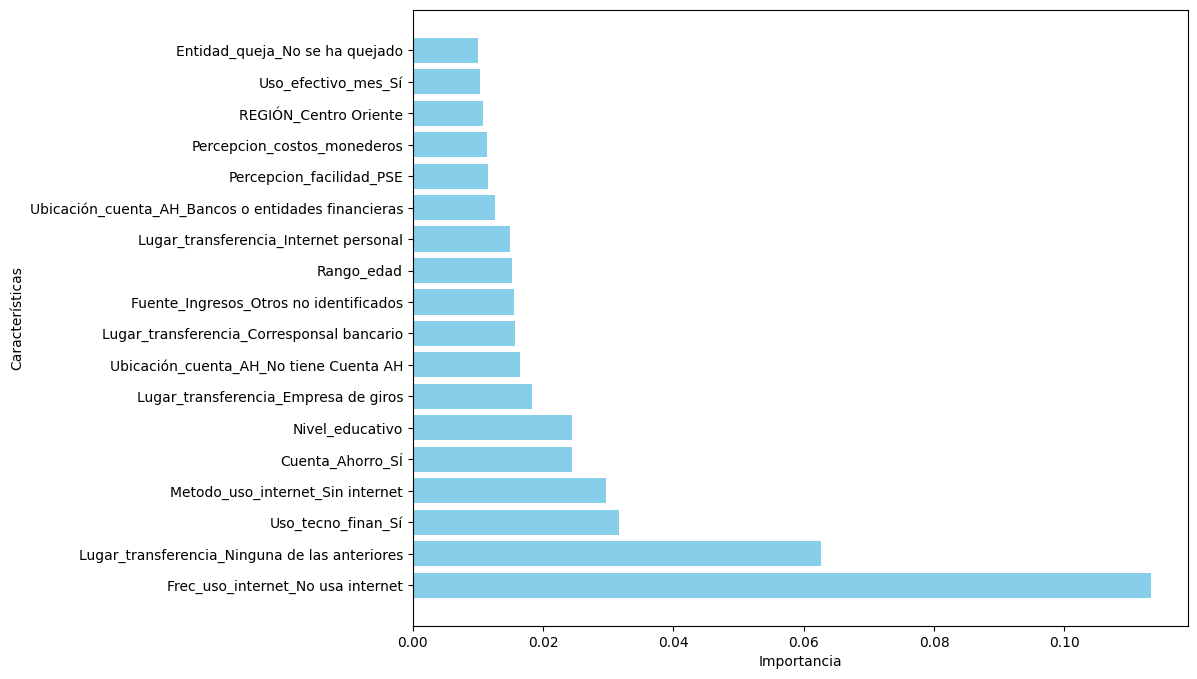

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener la importancia de las características
feature_importances = model_def.feature_importances_

# Crear un DataFrame con las características y su importancia
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar las características por su importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las 20 características más importantes
##top_20_features = importance_df.head(20)
top_20_features  = importance_df[importance_df['Importance'] > 0.01]

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title


In [ ]:
top_20_features

,Feature,Importance
35,Frec_uso_internet_No usa internet,0.113269
53,Lugar_transferencia_Ninguna de las anteriores,0.062723
122,Uso_tecno_finan_Sí,0.031579
42,Metodo_uso_internet_Sin internet,0.029716
16,Cuenta_Ahorro_SÍ,0.024494
10,Nivel_educativo,0.024426
51,Lugar_transferencia_Empresa de giros,0.018271
22,Ubicación_cuenta_AH_No tiene Cuenta AH,0.016488
50,Lugar_transferencia_Corresponsal bancario,0.015677
73,Fuente_Ingresos_Otros no identificados,0.015514


## MODELO DEFINITVO FT>01

In [9]:
# Definir la variable dependiente (target) y las variables independientes (features)
X = df_encoded[[
    'Uso_tecno_finan_Sí',
    'Frec_uso_internet_No usa internet',
    'Lugar_transferencia_Ninguna de las anteriores',
    'Rango_edad',
    'Nivel_educativo',
    'Percepcion_costos_monederos',
    'Percepcion_facilidad_PSE',
    'Rango_ingresos',
    'Percepcion_riesgo_Monedero',
    'Rango_gastos',
    'Metodo_uso_internet_Sin internet',
    'Satisfaccion_APPS_finan',
    'Percepcion_costos_Efectivo',
    'Percepcion_riesgo_pago_PSE',
    'Percepcion_facilidad_Efectivo',
    'Frecuencia_Ingresos',
    'Ubicación_cuenta_AH_No tiene Cuenta AH',
    'Percepcion_costos_PSE',
    'Percepcion_riesgo_pago_Efectivo',
    'Satisfaccion_web_finan',
    'REGIÓN_Centro Oriente',
    'Cuenta_Ahorro_SÍ',
    'Fuente_Ingresos_Otros no identificados',
    'Lugar_transferencia_Internet personal',
    'Lugar_transferencia_Corresponsal bancario',
    'Lugar_transferencia_Empresa de giros',
    'Ubicación_cuenta_AH_Bancos o entidades financieras',
    'Metodo_uso_internet_WIFI',
    'EstratoIMP',
    'Uso_efectivo_mes_Sí',
    'Entidad_queja_No se ha quejado'
]]

y = df_encoded['Pago_Digital']

In [10]:
# Convertir columnas booleanas a enteros (0 y 1)
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Asegurarse de que todas las variables sean numéricas
X = X.apply(pd.to_numeric, errors='coerce')

# Reemplazar cualquier NaN restante por 0 o cualquier otra estrategia de imputación que prefieras
X = X.fillna(0)

<ipython-input-10-65b7ad1ee5d9>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [11]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% de los datos se utilizarán para prueba
    random_state=42  # Semilla para reproducibilidad
)

print(f'Dimensión del conjunto de entrenamiento: {X_train.shape}')
print(f'Dimensión del conjunto de prueba: {X_test.shape}')

Dimensión del conjunto de entrenamiento: (3927, 31)
Dimensión del conjunto de prueba: (1683, 31)


### Entrenamiento FT>01

In [12]:
# prompt: genere un codigo para entrenar un modelo xgboost con todos los hiperparametros ajustables al usuario, no haga grilla, escriba la descripcion de cada hiperparametro

from xgboost import XGBClassifier

# Definir los hiperparámetros y sus valores por defecto
params = {
    'learning_rate': 0.042,  # Tasa de aprendizaje, controla la contribución de cada árbol. Valores típicos: 0.01-0.3.
    'n_estimators': 350,  # Número de árboles en el bosque. Mayor número puede mejorar el rendimiento, pero también el tiempo de entrenamiento.
    'max_depth': 3,  # Profundidad máxima de los árboles. Controla la complejidad del modelo.
    'min_child_weight': 6,  # Mínimo peso de la suma de los segundos derivados de la pérdida en las hojas de los árboles. Controla el crecimiento excesivo.
    'gamma': 0,  # Valor mínimo para dividir un nodo. Controla el crecimiento excesivo.
    'subsample': 0.625,  # Fracción de muestras utilizadas para entrenar cada árbol. Reduce el sobreajuste.
    'colsample_bytree': 0.875,  # Fracción de columnas utilizadas para entrenar cada árbol. Reduce el sobreajuste.
    ##'reg_alpha': [0],  # Regularización L1. Ayuda a prevenir el sobreajuste.
    ##'reg_lambda': [1],  # Regularización L2. Ayuda a prevenir el sobreajuste.
    'scale_pos_weight': 1.53,  # Peso de la clase minoritaria. Útil para conjuntos de datos desbalanceados.
    ##'objective': ['binary:logistic'],  # Función de pérdida para clasificación binaria.
    ##'eval_metric': ['logloss'],  # Métrica de evaluación.
    ##'use_label_encoder': [False],  # Evita advertencias de depreciación.
    'random_state': 42  # Semilla para la reproducibilidad.
}

# Crear el modelo XGBoost con los hiperparámetros definidos
model_def_fi = XGBClassifier(**params)

# Entrenar el modelo
model_def_fi.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.875, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.042, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### 2. Evaluacion FT>01

Confusion Matrix:
[[536 271]
 [162 714]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       807
           1       0.72      0.82      0.77       876

    accuracy                           0.74      1683
   macro avg       0.75      0.74      0.74      1683
weighted avg       0.75      0.74      0.74      1683



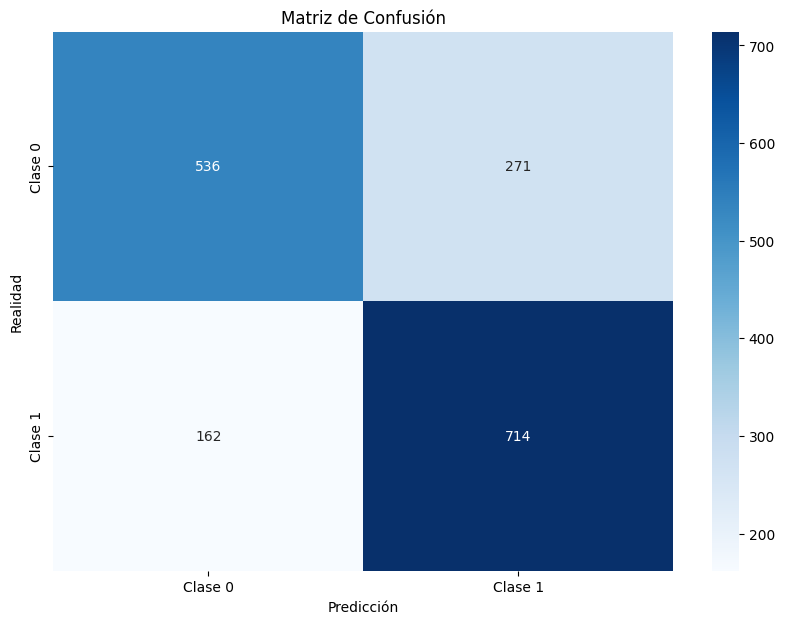

In [13]:
# Evaluar el modelo con los mejores hiperparámetros
##model_def = random_search.best_estimator_
y_pred = model_def_fi.predict(X_test)

# Mostrar el reporte de clasificación y la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Mostrar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()


### 3. Validacion cruzada FT>01

In [14]:
# prompt: REALIZAR VALIDACION CRUZADA PARA EVALUAR EL MODELO ANTERIOR

from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 folds
cv_scores = cross_val_score(model_def_fi, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Scores de Validación Cruzada:", cv_scores)
print("Accuracy promedio de Validación Cruzada:", cv_scores.mean())


Scores de Validación Cruzada: [0.77005348 0.74777184 0.77183601 0.75935829 0.73618538]
Accuracy promedio de Validación Cruzada: 0.7570409982174688


### 4. Importancia de cacrteristicas

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

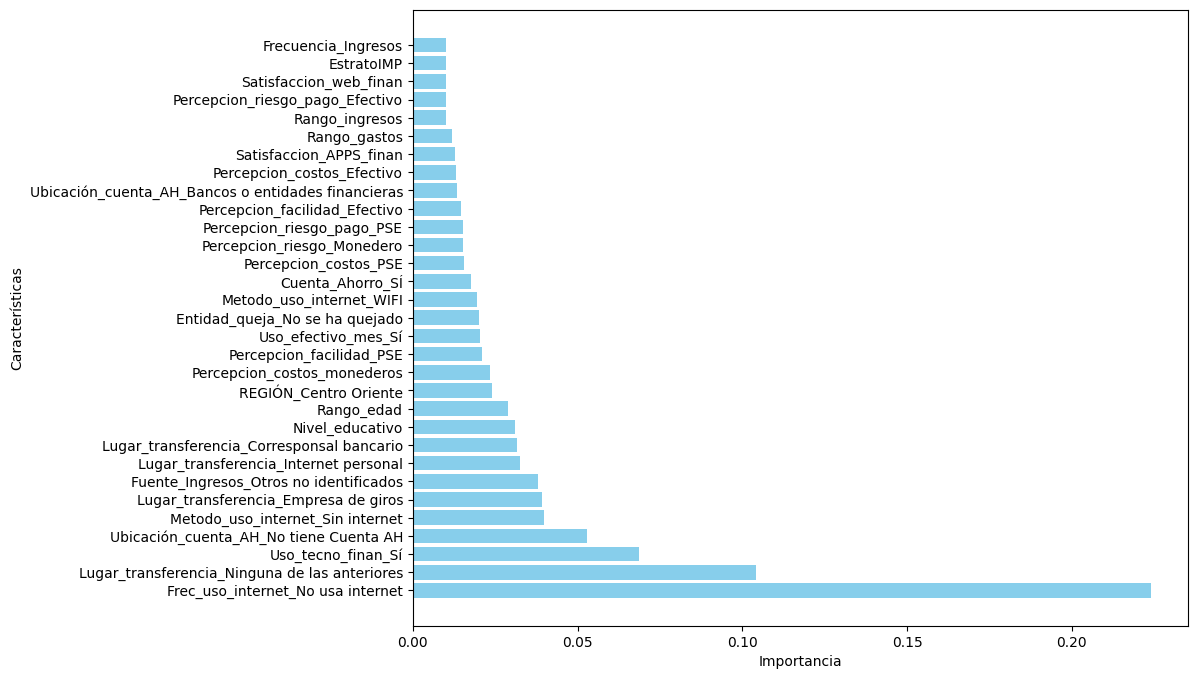

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener la importancia de las características
feature_importances = model_def_fi.feature_importances_

# Crear un DataFrame con las características y su importancia
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar las características por su importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las 20 características más importantes
##top_20_features = importance_df.head(20)
top_20_features  = importance_df[importance_df['Importance'] > -100]

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title


In [19]:
top_20_features

,Feature,Importance
1,Frec_uso_internet_No usa internet,0.224008
2,Lugar_transferencia_Ninguna de las anteriores,0.104304
0,Uso_tecno_finan_Sí,0.068655
16,Ubicación_cuenta_AH_No tiene Cuenta AH,0.052880
10,Metodo_uso_internet_Sin internet,0.039964
25,Lugar_transferencia_Empresa de giros,0.039103
22,Fuente_Ingresos_Otros no identificados,0.037922
23,Lugar_transferencia_Internet personal,0.032664
24,Lugar_transferencia_Corresponsal bancario,0.031607
4,Nivel_educativo,0.031074


### SHAP VALUES

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt

 96%|=================== | 1612/1683 [00:27<00:01]       

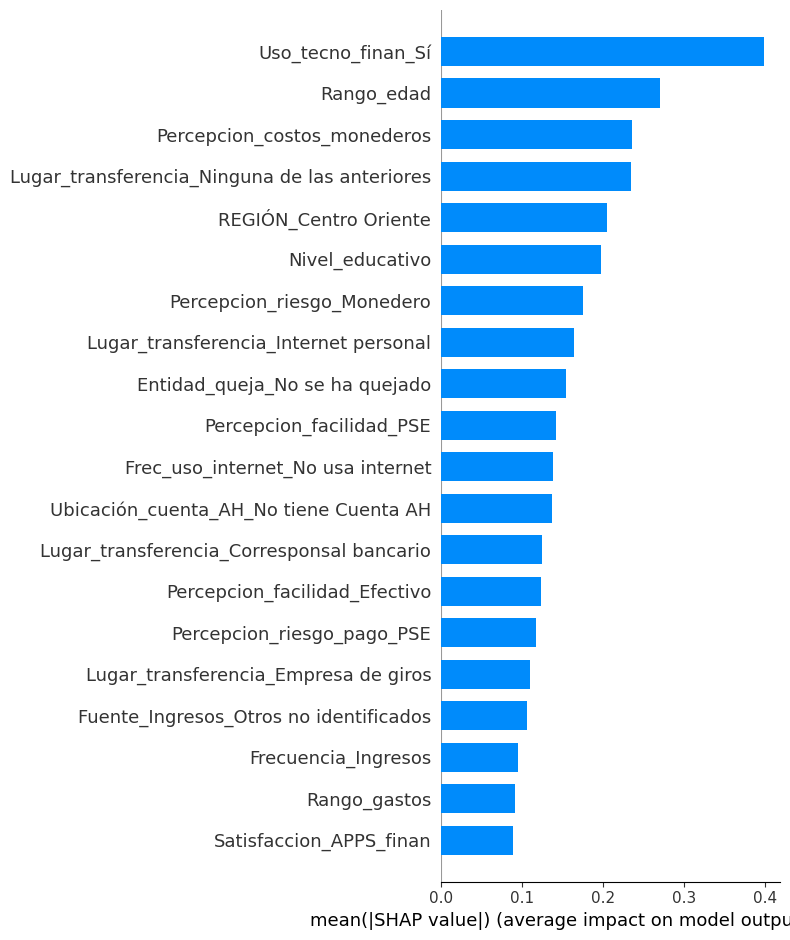

In [42]:
# prompt: genere un grafico de barras donde observe el valor de shap values en orden de importancia

# Calculate SHAP values
explainer = shap.Explainer(model_def_fi, X_train)
shap_values = explainer(X_test)

# Create the summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

 97%|=================== | 1638/1683 [00:34<00:00]       

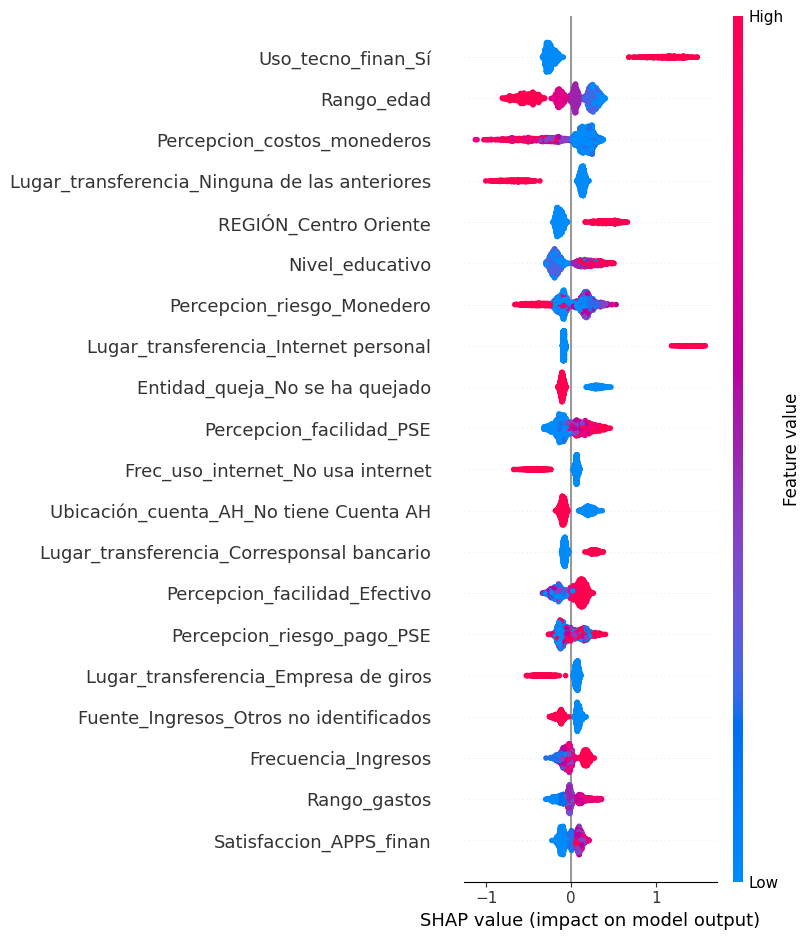

In [41]:
explainer = shap.Explainer(model_def_fi, X_train) # Use your final model
shap_values = explainer(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

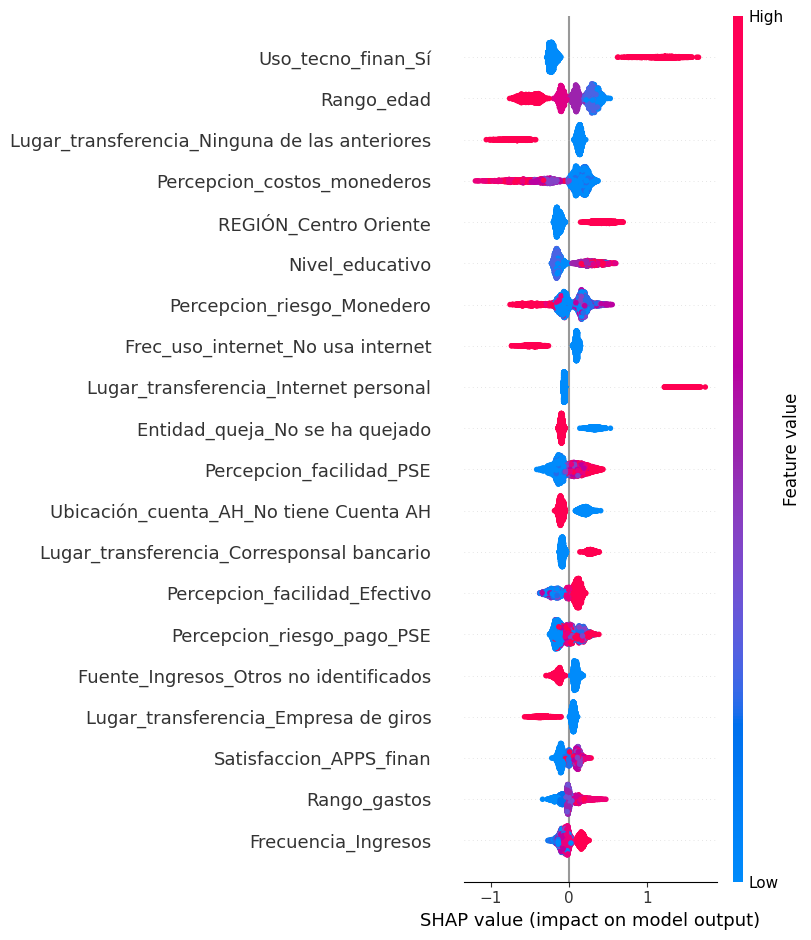

Text(0.5, 1.0, 'Impacto de las características en el uso de medios de pago digital')

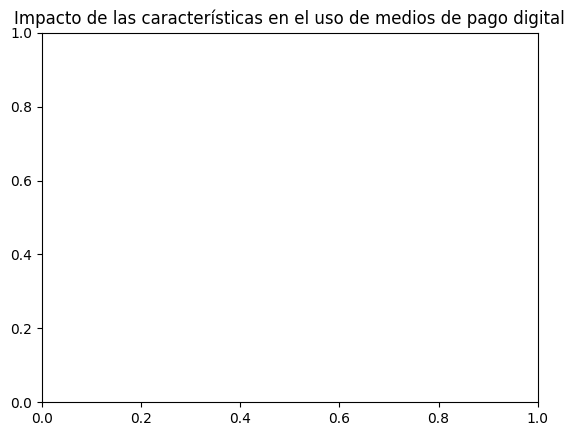

In [25]:
# Crear un objeto explainer de SHAP para el modelo
explainer = shap.TreeExplainer(model_def_fi)  # model_def_fi es el modelo ya entrenado

# Calcular los valores SHAP para las instancias en el conjunto de datos de entrenamiento
shap_values = explainer.shap_values(X_train)

# Visualización detallada: impacto de cada característica
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_train, show=True)
plt.title("Impacto de las características en el uso de medios de pago digital")